# Final State Radiation

In this notebook, we use `hazma` to compute final state radiation (FSR) for dark matter fermions $\chi$ annihilating to electron, muons and pions. The easiest way to get to the FSR functions is to first declare the paramaters of the model, then compute a mediator object. For example:
```
sm_params = {"mx" : 250., "ms" : 600., "gsxx" :  1., "gsff" :  1., "gsGG" :  1., "gsFF" :  1.}
SM = ScalarMediator(**params)
```
Then, we need to specify our gamma-ray energies and our center of mass energy, all in MeV:
```
cme = 1000.
egams = numpy.logspace(-3., 3. , num=150)
```
We can then compute the spectrum values at those gamma-ray energies by calling, for example:
```
sm_fsr_e = dnde_xx_to_s_to_ffg(egams, cme, me, SM)
```

## Imports

The mediator classes are stored in `hazma.$mediator` where `$mediator` = `scalar`, `vector`. The FSR functions are stored in `hazma.$mediator.$mediator_mediator_fsr`.

In [25]:
from hazma.scalar_mediator import ScalarMediator
from hazma.vector_mediator import VectorMediator

from hazma.scalar_mediator.scalar_mediator_fsr import dnde_xx_to_s_to_ffg, dnde_xx_to_s_to_pipig, __msqrd_xx_to_s_to_pipig
from hazma.vector_mediator.vector_mediator_fsr import dnde_xx_to_v_to_ffg, dnde_xx_to_v_to_pipig

from hazma.parameters import electron_mass as me
from hazma.parameters import muon_mass as mmu
from hazma.parameters import charged_pion_mass as mpi

from hazma.field_theory_helper_functions.three_body_phase_space import t_lim1, t_lim2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Scalar Mediator FSR

First, we specify the scalar mediator couplings at the 1 GeV scale and make a scalar mediator object.

In [2]:
sm_params = {"mx" : 250., "ms" : 600., "gsxx" :  1., "gsff" :  1., "gsGG" :  1., "gsFF" :  1.}

SM = ScalarMediator(**sm_params)

Next, we declare the gamma ray energies and the center of mass energy and compute the FSR spectra.

In [3]:
cme = 1000.
egams = np.logspace(-2., np.log10(cme), num=150)

sm_fsr_e = dnde_xx_to_s_to_ffg(egams, cme, me, SM)
sm_fsr_mu = dnde_xx_to_s_to_ffg(egams, cme, mmu, SM)
sm_fsr_pi = dnde_xx_to_s_to_pipig(egams, cme, SM)

/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/hazma/scalar_mediator/scalar_mediator_fsr.py:135: NegativeSquaredMatrixElementWarning: Negative squared matrix elementencountered. Using zero instead.
  warnings.warn(msg, NegativeSquaredMatrixElementWarning)


TypeError: no ordering relation is defined for complex numbers

Now we can plot!

In [ ]:
plt.figure(dpi=100)
plt.loglog(egams, sm_fsr_e, label=r"$X = e^{+}e^{-}$")
plt.loglog(egams, sm_fsr_mu, label=r"$X = \mu^{+}\mu^{-}$")
plt.loglog(egams, sm_fsr_pi, label=r"$X = \pi^{+}\pi^{-}$")
plt.title(r"$\bar{\chi}\chi\to S^{*}\to X$")
plt.xlabel(r"$E_{\gamma}$ (MeV)")
plt.ylabel(r"$\frac{dN}{dE_{\gamma}}$ (MeV$^{-1}$)")
plt.legend()

In [9]:
np.sqrt(s)

989.94949366116657

In [28]:
t

740339.4751452324

In [32]:
t_lim1(s, 0.0, mpi, mpi, cme)

21693.253479714669

In [33]:
t_lim2(s, 0.0, mpi, mpi, cme)

117266.41681075016

In [59]:
from hazma.parameters import qe, vh, b0
from hazma.parameters import up_quark_mass as muq
from hazma.parameters import down_quark_mass as mdq

def __msqrd_xx_to_s_to_pipig(Q, s, t, params):
    ret_val = 0.0

    mx = params.mx
    gsff = params.gsff
    gsGG = params.gsGG
    vs = params.vs
    gsxx = params.gsxx
    ms = params.ms
    width_s = params.width_s

    if 2. * mpi < Q and 4. * mpi**2 < s < Q**2 and 2. * mx < Q:
        if t_lim1(s, 0.0, mpi, mpi, Q) < t < t_lim2(s, 0.0, mpi, mpi, Q):
            ret_val = (-2 * gsxx**2 * (Q**2 - 4 * mx**2) * qe**2 *
                       (mpi**4 * s - Q**2 * s * t + mpi**2 *
                        (Q**4 + t * (-s + t) +
                         Q**2 * (s + 2 * t))) *
                       (-54 * gsGG * (2 * mpi**2 - Q**2 - s - t) * vh *
                        (3 * vh + 3 * gsff * vs + 2 * gsGG * vs) +
                        b0 * (mdq + muq) * (9 * vh + 4 * gsGG * vs) *
                        (54 * gsGG * vh - 32 * gsGG**2 * vs +
                         9 * gsff * (9 * vh + 16 * gsGG * vs)))**2) / \
                (729. * (mpi**2 + Q**2)**2 * (mpi**2 - t)**2 * vh**2 *
                 (3 * vh + 3 * gsff * vs + 2 * gsGG * vs)**2 *
                 (9 * vh + 4 * gsGG * vs)**2 *
                 ((Q**2 - ms**2 + s + t)**2 + (ms * width_s)**2))
    
    print(ret_val)

    if ret_val <= 0.0:
        msg = ""
        print("FUCK")
        #warnings.warn(msg, NegativeSquaredMatrixElementWarning)
        ret_val = 0.0

    return ret_val

In [61]:
s = cme**2 - 2. * cme * 10**-3.
t = abs(t_lim1(s, 0.0, mpi, mpi, cme) + t_lim2(s, 0.0, mpi, mpi, cme)) / 2.

__msqrd_xx_to_s_to_pipig(cme, s, t, SM)

-0.00355207298169
FUCK


0.0

## Vector Mediator FSR

In [24]:
vm_params = {"mx" : 250., "mv" : 600., "gvxx" : 1.,"gvuu" : 1., "gvdd" : -1., 
             "gvss" : 1., "gvee" : 1., "gvmumu" : 1.}

VM = VectorMediator(**vm_params)

In [25]:
cme = 1000.
egams = np.logspace(-2., np.log10(cme), num=150)

vm_fsr_e = dnde_xx_to_v_to_ffg(egams, cme, "e", VM)
vm_fsr_mu = dnde_xx_to_v_to_ffg(egams, cme, "mu", VM)
vm_fsr_pi = dnde_xx_to_v_to_pipig(egams, cme, VM)

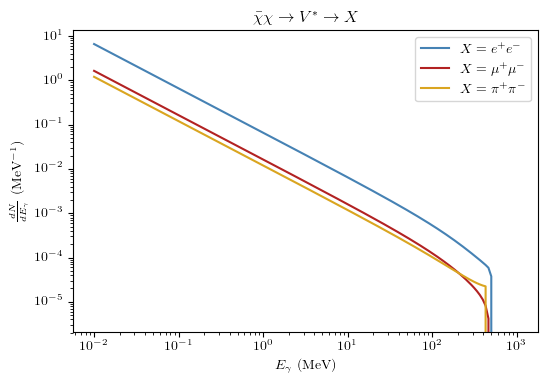

In [26]:
plt.figure(dpi=100)
plt.loglog(egams, vm_fsr_e, label=r"$X = e^{+}e^{-}$")
plt.loglog(egams, vm_fsr_mu, label=r"$X = \mu^{+}\mu^{-}$")
plt.loglog(egams, vm_fsr_pi, label=r"$X = \pi^{+}\pi^{-}$")
plt.title(r"$\bar{\chi}\chi\to V^{*}\to X$")
plt.xlabel(r"$E_{\gamma}$ (MeV)")
plt.ylabel(r"$\frac{dN}{dE_{\gamma}}$ (MeV$^{-1}$)")
plt.legend()

## Compare with Alterelli-Parisi

In [3]:
sm_params = {"mx" : 100., "ms" : 600., "gsxx" :  1., "gsff" :  1., "gsGG" :  1., "gsFF" :  1.}
vm_params = {"mx" : 100., "mv" : 600., "gvxx" : 1.,"gvuu" : 1., "gvdd" : -1., 
             "gvss" : 1., "gvee" : 1., "gvmumu" : 1.}

SM = ScalarMediator(**sm_params)
VM = VectorMediator(**vm_params)

In [4]:
def AP(eng_gam, mass, cme):
    x0 = 2. * eng_gam / cme
    eps = 2 * mass / cme
    pre_fac = 1.0 / (137.0 * np.pi) * 2. / cme
    split_func = (1. + (1. - x0)**2) / x0
    log_sup = (-1. + np.log(4. * (1 - x0) / eps**2))
    return pre_fac * split_func * log_sup

apvec = np.vectorize(AP)

In [ ]:
cme = 215.
egams = np.logspace(-2., np.log10(cme), num=150)
sm_fsr_mu_215 = dnde_xx_to_s_to_ffg(egams, cme, mmu, SM)
vm_fsr_mu_215 = dnde_xx_to_v_to_ffg(egams, cme, "mu", VM)
ap_fsr_mu_215 = AP(egams, mmu, cme)

cme = 250.
egams = np.logspace(-2., np.log10(cme), num=150)
sm_fsr_mu_250 = dnde_xx_to_s_to_ffg(egams, cme, mmu, SM)
vm_fsr_mu_250 = dnde_xx_to_v_to_ffg(egams, cme, "mu", VM)
ap_fsr_mu_250 = AP(egams, mmu, cme)

cme = 300.
egams = np.logspace(-2., np.log10(cme), num=150)
sm_fsr_mu_300 = dnde_xx_to_s_to_ffg(egams, cme, mmu, SM)
vm_fsr_mu_300 = dnde_xx_to_v_to_ffg(egams, cme, "mu", VM)
ap_fsr_mu_300 = AP(egams, mmu, cme)

cme = 500.
egams = np.logspace(-2., np.log10(cme), num=150)
sm_fsr_mu_500 = dnde_xx_to_s_to_ffg(egams, cme, mmu, SM)
vm_fsr_mu_500 = dnde_xx_to_v_to_ffg(egams, cme, "mu", VM)
ap_fsr_mu_500 = AP(egams, mmu, cme)

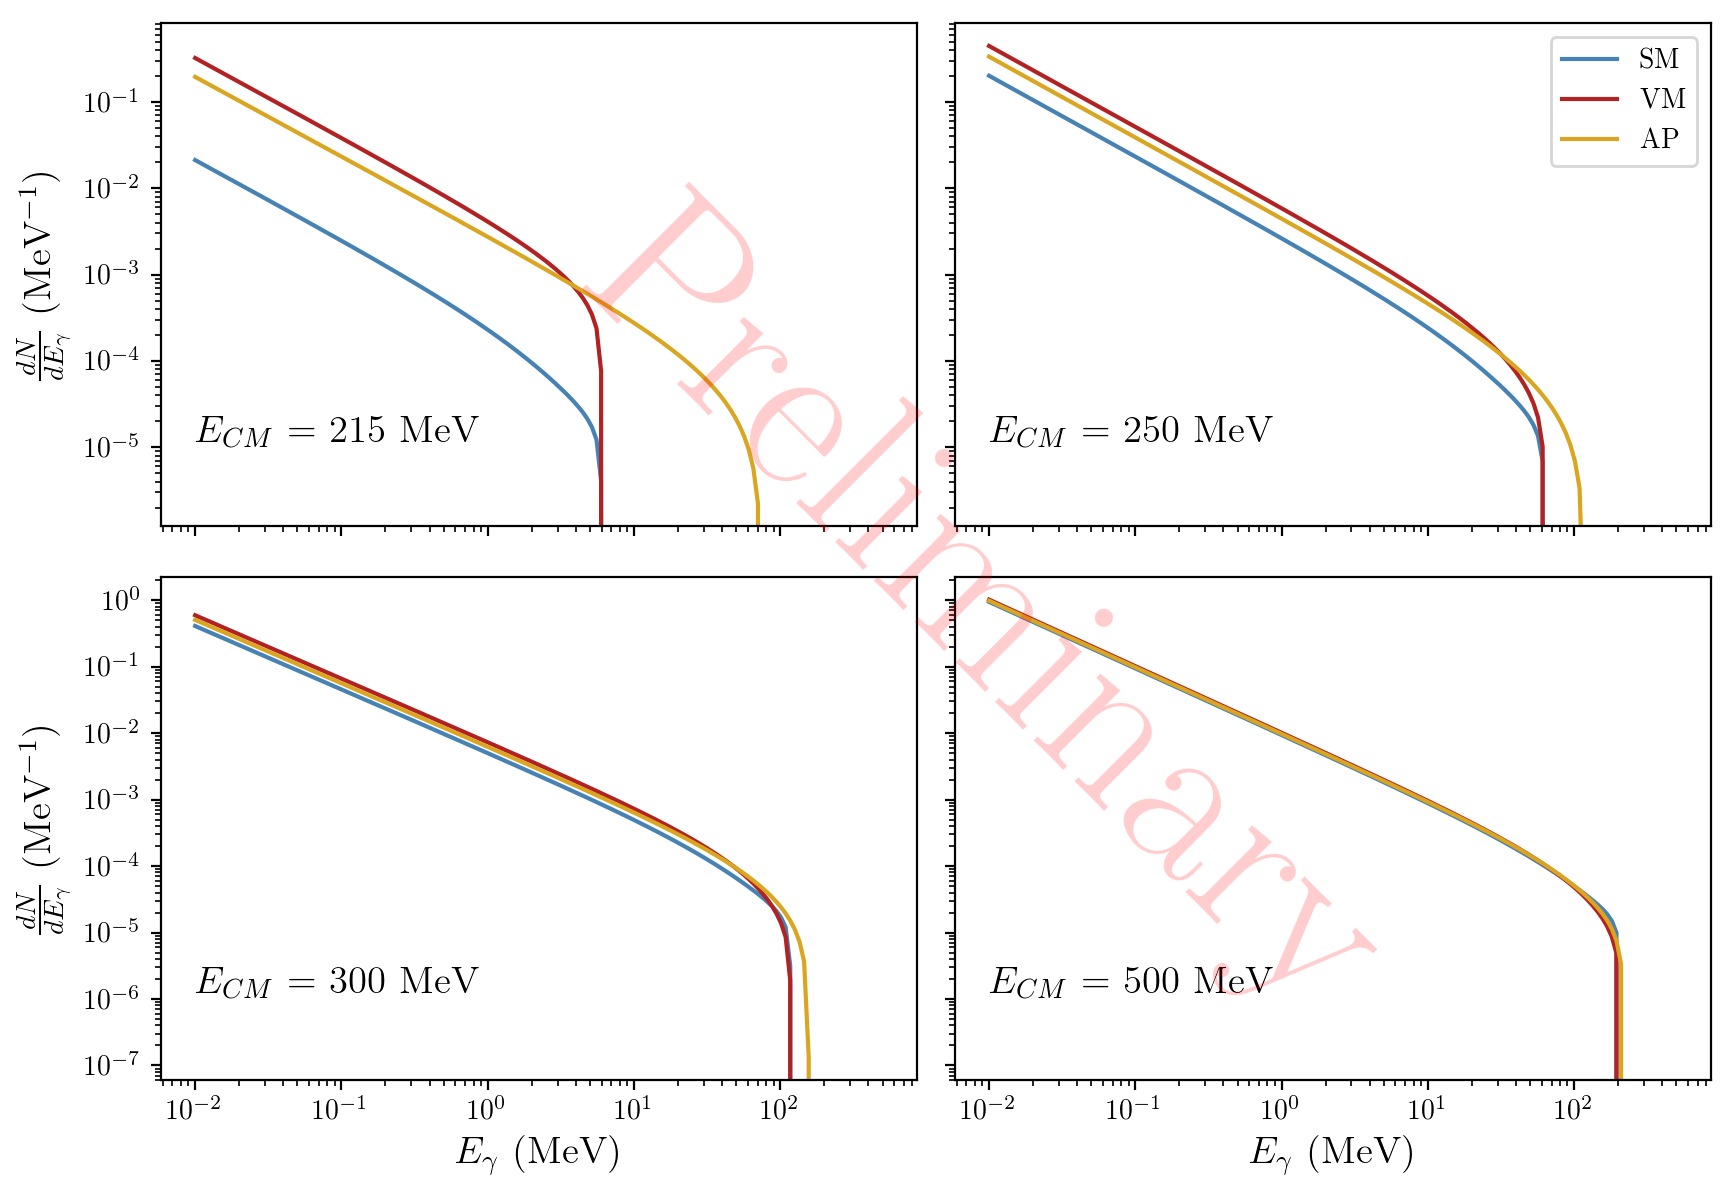

In [47]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,7), squeeze=True)

f.dpi=200

ax1.loglog(egams, sm_fsr_mu_215, label=r"SM")
ax1.loglog(egams, vm_fsr_mu_215, label=r"VM")
ax1.loglog(egams, ap_fsr_mu_215, label=r"AP")

ax2.loglog(egams, sm_fsr_mu_250, label=r"SM")
ax2.loglog(egams, vm_fsr_mu_250, label=r"VM")
ax2.loglog(egams, ap_fsr_mu_250, label=r"AP")

ax3.loglog(egams, sm_fsr_mu_300, label=r"SM")
ax3.loglog(egams, vm_fsr_mu_300, label=r"VM")
ax3.loglog(egams, ap_fsr_mu_300, label=r"AP")

ax4.loglog(egams, sm_fsr_mu_500, label=r"SM")
ax4.loglog(egams, vm_fsr_mu_500, label=r"VM")
ax4.loglog(egams, ap_fsr_mu_500, label=r"AP")


# Plot labels
ax1.text(10**-2, 10**-5, r"$E_{CM}$ = 215 MeV", fontsize=14)
ax2.text(10**-2, 10**-5, r"$E_{CM}$ = 250 MeV", fontsize=14)
ax3.text(10**-2, 10**-6, r"$E_{CM}$ = 300 MeV", fontsize=14)
ax4.text(10**-2, 10**-6, r"$E_{CM}$ = 500 MeV", fontsize=14)

# Axes Labels
ax3.set_xlabel(r"$E_{\gamma}$ (MeV)", fontsize=14)
ax4.set_xlabel(r"$E_{\gamma}$ (MeV)", fontsize=14)

ax1.set_ylabel(r"$\frac{dN}{dE_{\gamma}}$ (MeV$^{-1}$)", fontsize=14)
ax3.set_ylabel(r"$\frac{dN}{dE_{\gamma}}$ (MeV$^{-1}$)", fontsize=14)

# Remove whitespace
plt.subplots_adjust(wspace=0.05, hspace=0.1)

# Add watermark
plt.text(0.00001, 10000, "Preliminary", fontsize=80,rotation=-45, alpha=0.2, color="r")

ax2.legend()

plt.savefig("figures/muon_fsr.pdf")
